# Exercise 1.2 - Multivariate Linear Regression
This notebook covers my solutions to Andrew Ng's Machine Learning course Exercise 1.

The next dataset includes housing prices with house size, number of bedrooms and the price of the house.

Start with importing and inspecting the data.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import os

# Load and examine data
path = os.path.join(os.getcwd(), 'data', 'ex1data2.txt')
data = pd.read_csv(path, header=None, names=['Size','Bedrooms','Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Create a statistical summary

In [2]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Notice house sizes are a few orders of magnitude greater than the bedroom. First step is to perform feature scaling and mean normalisation to speed up the convergence of gradient descent:

$$ x_i := \frac{x_i - \mu_i}{\sigma_x} $$

Create a feature normalisation function.

In [3]:
def featureNormalise(X):
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
        
    X_norm = (X- mu)/sigma
 
    return X_norm, mu, sigma

Let's repeat the pre-processing steps from Part 1 and apply the feature normalisation.

In [4]:
# Separate the feature set from the result parameter
m, n = data.shape
X = np.matrix(data.iloc[:,0:(n-1)])
y = np.matrix(data.iloc[:,(n-1)]).T

# Apply feature normalisation to given features, then add column of ones
X_norm, mu, sigma = featureNormalise(X)
X_norm = np.concatenate((np.ones((m, 1)), X_norm), axis=1)

y_norm, mu, sigma = featureNormalise(y)

Now we need to redefine the `gradientDescent()` function to be compatible with multiple variable $X$ matrix. The vectorised implementation is given by:

$$\theta := \theta - \alpha\delta $$

Where:
$$\delta :=\frac{1}{m}\sum_{i=1}^m((h_\theta(x_i)-y_i)x_i)$$

In [5]:
def gradientDescent(X, y, theta, alpha, n):
    """ Perform gradient descent to learn theta """
    
    cost = np.zeros(n)
    m = y.size
    
    for i in range(n):
        
        diff = np.dot(X, theta.T) - y
            
        inner = np.multiply(diff, X)
        delta = np.sum(inner, axis=0)/m
            
        theta = theta - alpha*delta
        
        # Compute the new cost
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Defining the same cost function as previously

In [6]:
def computeCost(X, y, theta):
    """ Vectorised form of the least squares cost function """
    
    m = len(y)
    h = np.dot(X, theta.T)
    diff = np.power(h - y, 2)
    J = np.sum(diff)/(2*m)
    
    return J

Now, let's apply the function over the dataset

In [8]:
# Some gradient descent settings
theta = np.matrix(np.zeros(n))
iterations = 400
alpha = 0.01

# Apply gradiant descent
theta, cost = gradientDescent(X_norm, y_norm, theta, alpha, iterations)
print(theta)

[[ -1.04301910e-16   8.03633076e-01   2.64102334e-02]]


Now, let's plot the cost function

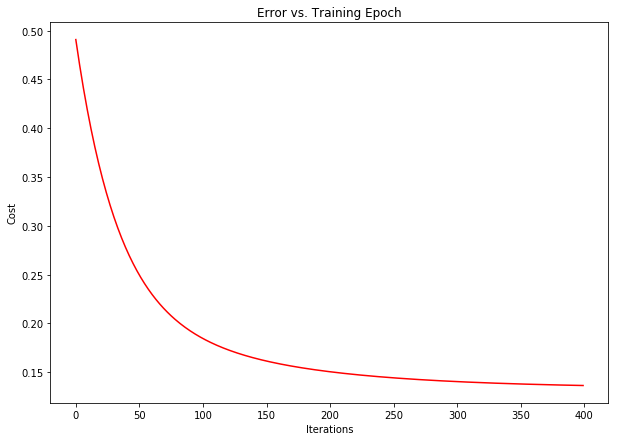

In [9]:
plt.figure(figsize=(10,7))  
plt.plot(np.arange(iterations), cost, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Epoch')  
plt.show()